In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Inspection

In [3]:
housing.shape

(545, 13)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Data Cleaning

In [8]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

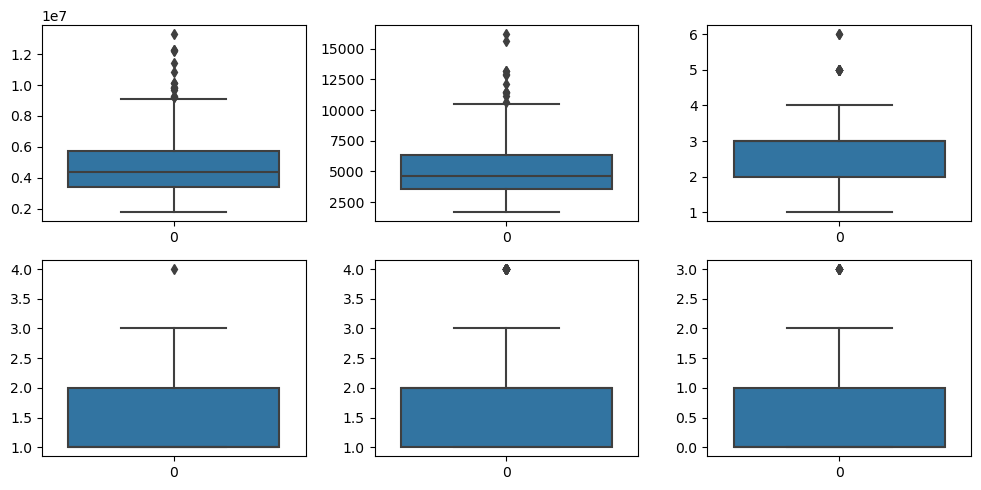

In [10]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

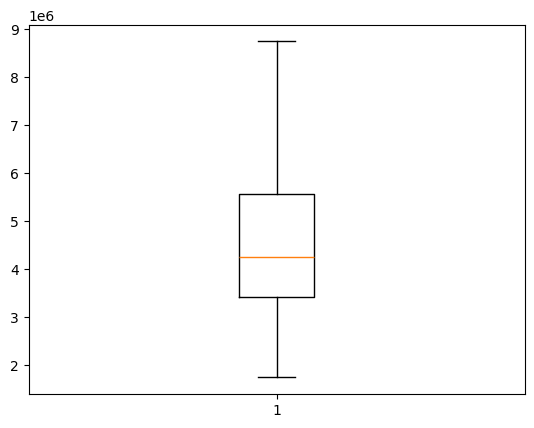

In [20]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

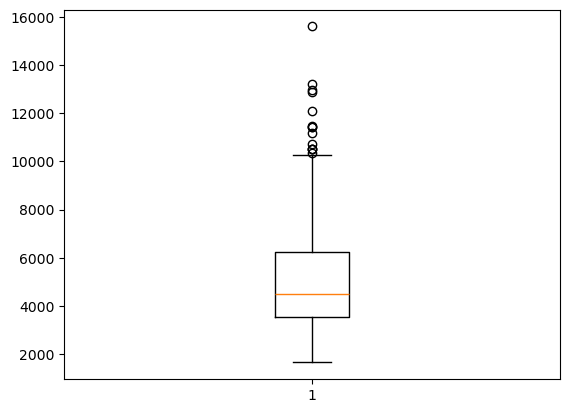

In [21]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

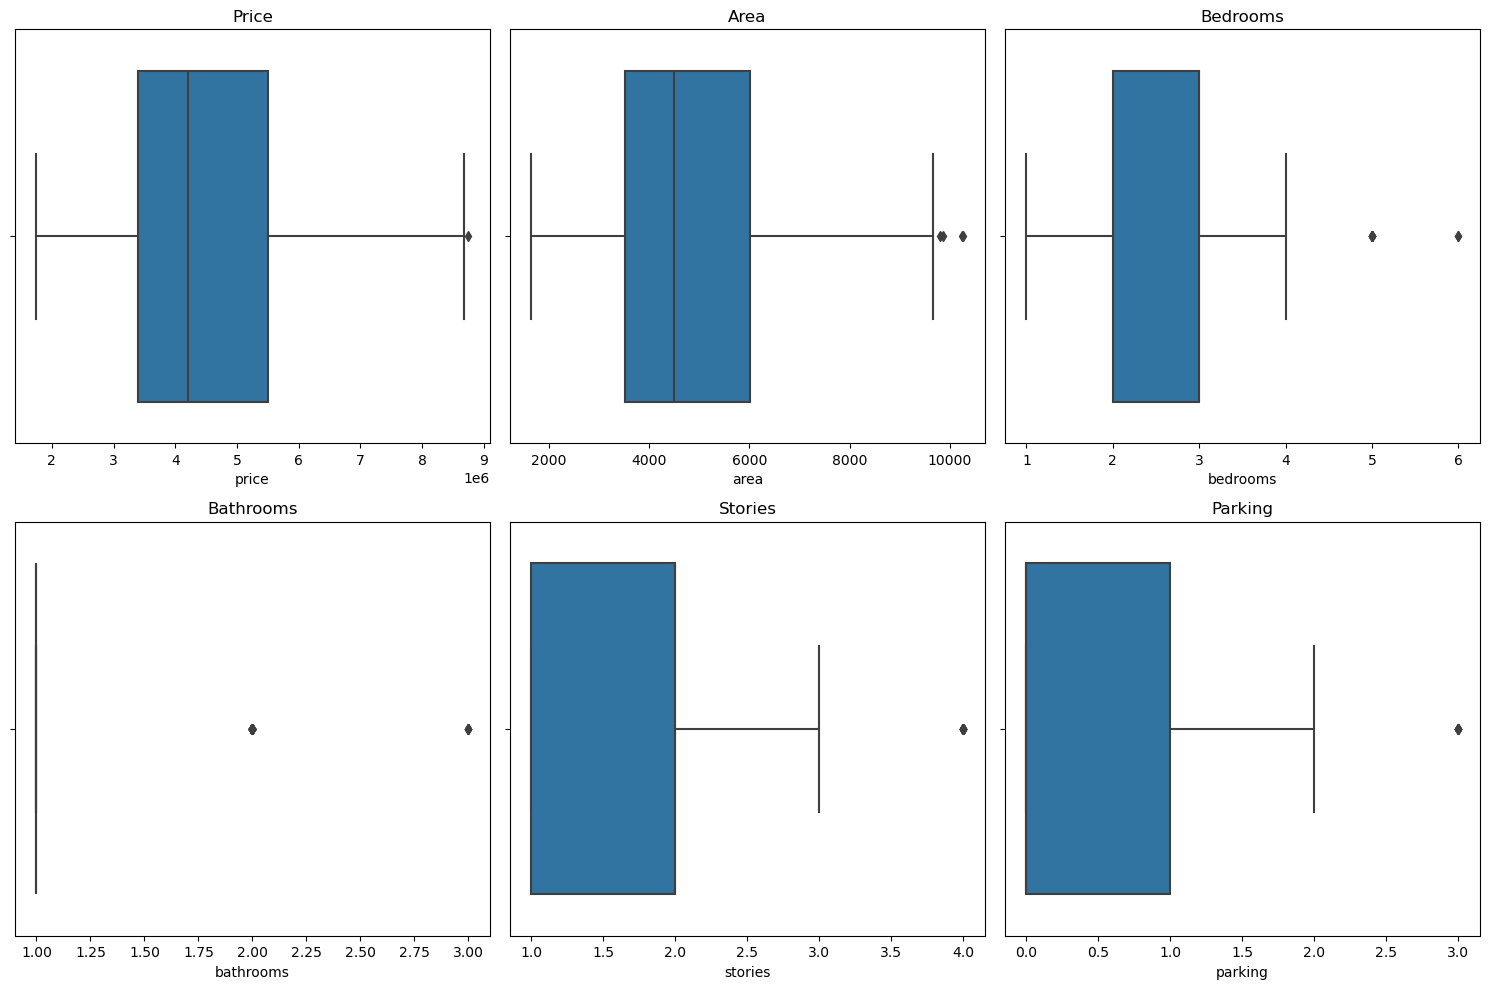

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Boxplots
sns.boxplot(x=housing['price'], ax=axs[0, 0])
sns.boxplot(x=housing['area'], ax=axs[0, 1])
sns.boxplot(x=housing['bedrooms'], ax=axs[0, 2])
sns.boxplot(x=housing['bathrooms'], ax=axs[1, 0])
sns.boxplot(x=housing['stories'], ax=axs[1, 1])
sns.boxplot(x=housing['parking'], ax=axs[1, 2])


axs[0, 0].set_title('Price')
axs[0, 1].set_title('Area')
axs[0, 2].set_title('Bedrooms')
axs[1, 0].set_title('Bathrooms')
axs[1, 1].set_title('Stories')
axs[1, 2].set_title('Parking')

# Adjust layout
plt.tight_layout()


### Exploratory Data Analytics
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

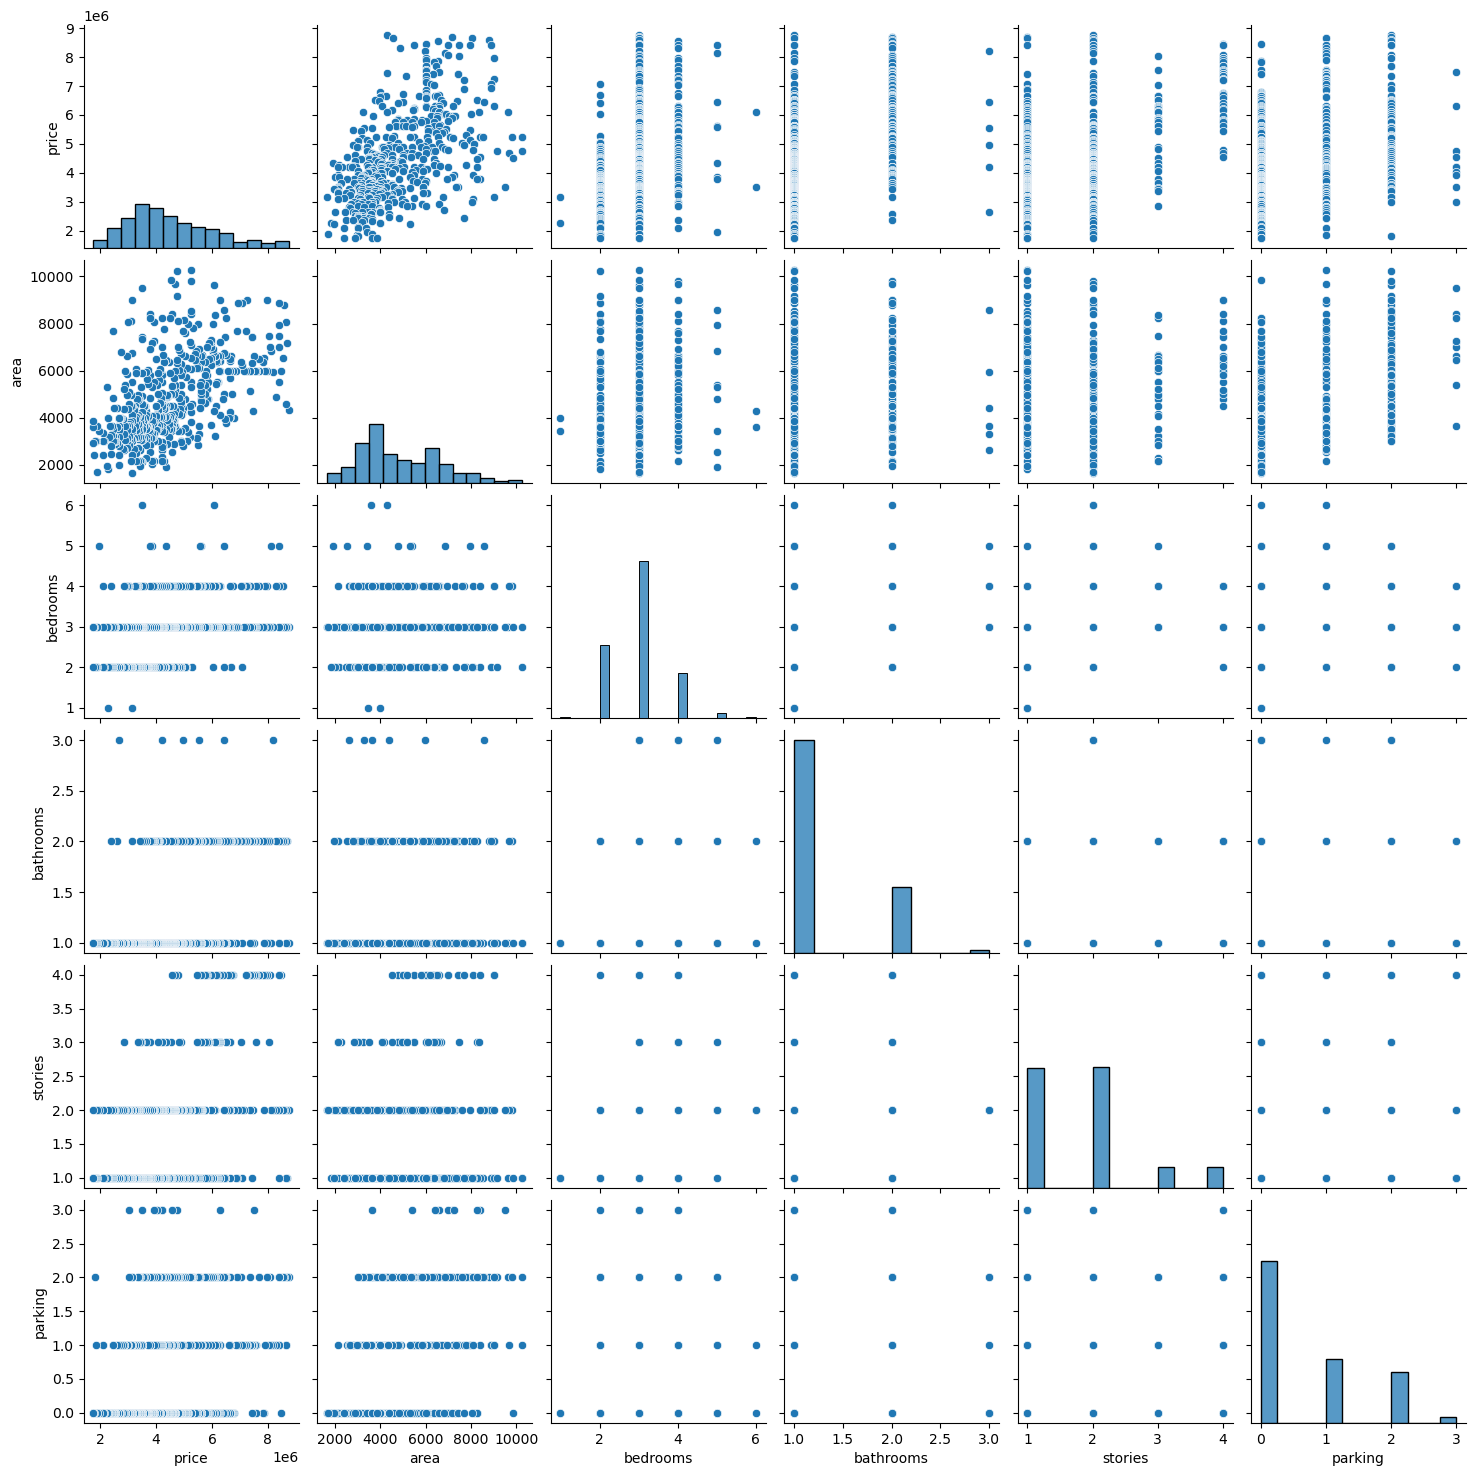

In [24]:
sns.pairplot(housing)
plt.show()

### Visualising Categorical Variables¶
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

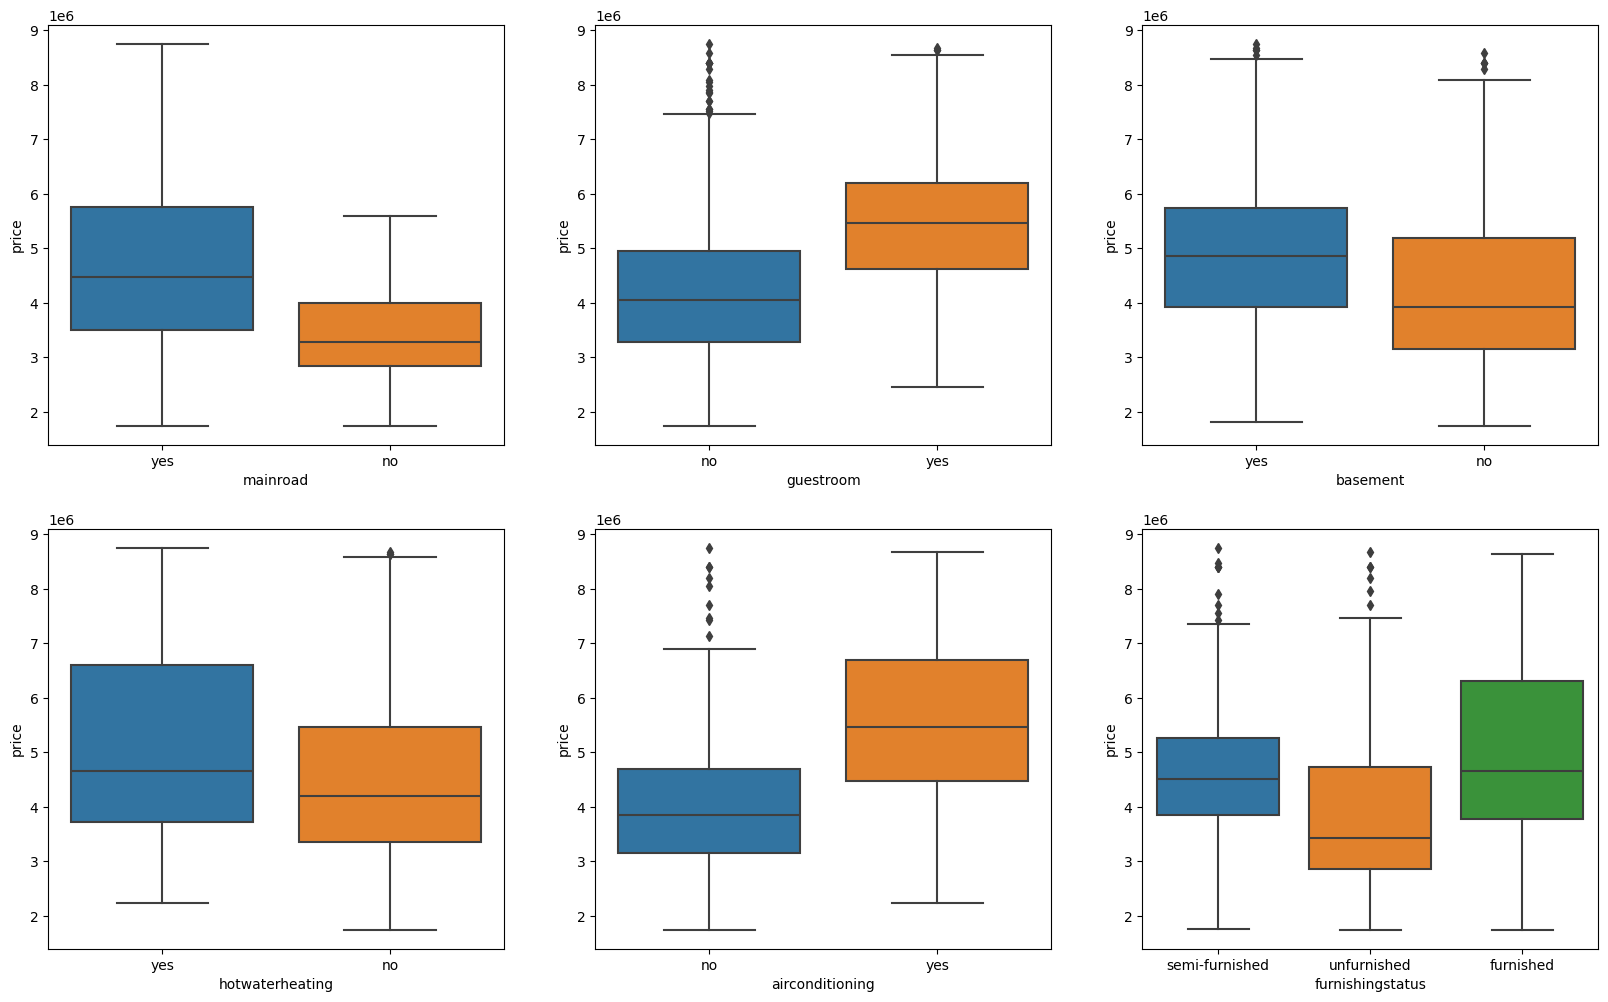

In [27]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()


##### We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for furnishingstatus with airconditioning as the hue.

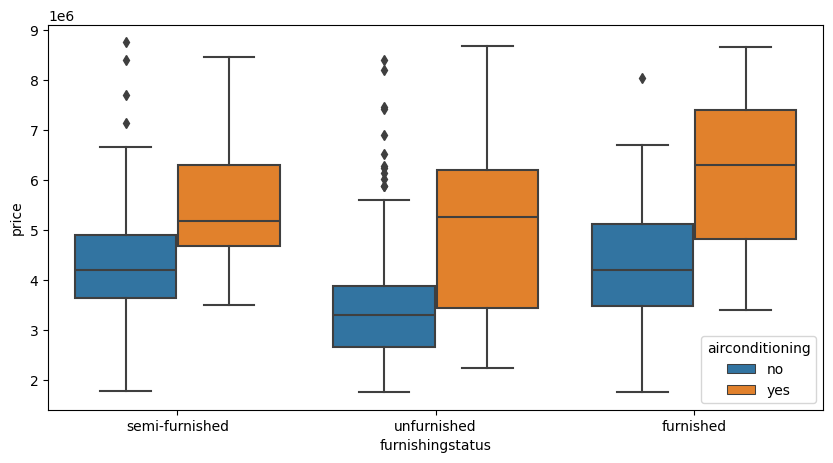

In [32]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()


### Data Preparation

#### You can see that your dataset has many columns with values as 'Yes' or 'No'.

But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [33]:
 #List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [34]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished


### Dummy Variables
The variable furnishingstatus has three levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.

In [35]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [37]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
20,False,True,False
21,False,False,True
22,True,False,False
23,True,False,False
24,True,False,False


#### Now, you don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —

00 will correspond to furnished
01 will correspond to unfurnished
10 will correspond to semi-furnished

In [41]:
#dropping the first column from status df using 'drop_first= True'
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [42]:
#Adding results to original housing df
housing = pd.concat([housing, status], axis = 1)

In [43]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished,semi-furnished,unfurnished
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished,True,False,True,False
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished,False,True,False,True
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished,False,False,False,False
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished,False,False,False,False
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished,False,False,False,False


In [44]:
# Drop 'furnishingstatus' as dummies is already created

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [45]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,semi-furnished,unfurnished
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,True,False,True,False
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,False,True,False,True
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,False,False,False,False
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,False,False,False,False
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,False,False,False,False


#### Splitting the Data into Training and Testing Sets

In [49]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features¶
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [55]:
# Applying scaler() to all the columns except 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,semi-furnished,unfurnished
100,0.640,0.576251,0.25,0.5,0.000000,1,0,1,0,1,0.000000,1,False,True,False,True
487,0.160,0.436554,0.50,0.0,0.333333,1,0,0,0,0,0.000000,0,False,True,False,True
248,0.399,0.285215,0.00,0.5,0.000000,1,1,1,0,0,0.000000,0,True,False,True,False
109,0.620,0.577998,0.50,0.5,0.333333,1,1,0,1,0,0.333333,0,True,False,True,False
499,0.130,0.230501,0.25,1.0,0.333333,0,1,0,0,0,0.000000,0,False,True,False,True


In [58]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.391666,0.374467,0.238095,0.127451,0.265173,0.851541,0.182073,0.355742,0.042017,0.319328,0.220355,0.204482
std,0.216398,0.200460,0.186533,0.233747,0.287088,0.356054,0.386446,0.479410,0.200909,0.466871,0.284860,0.403889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230000,0.227008,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.350000,0.331781,0.250000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.530000,0.506403,0.250000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


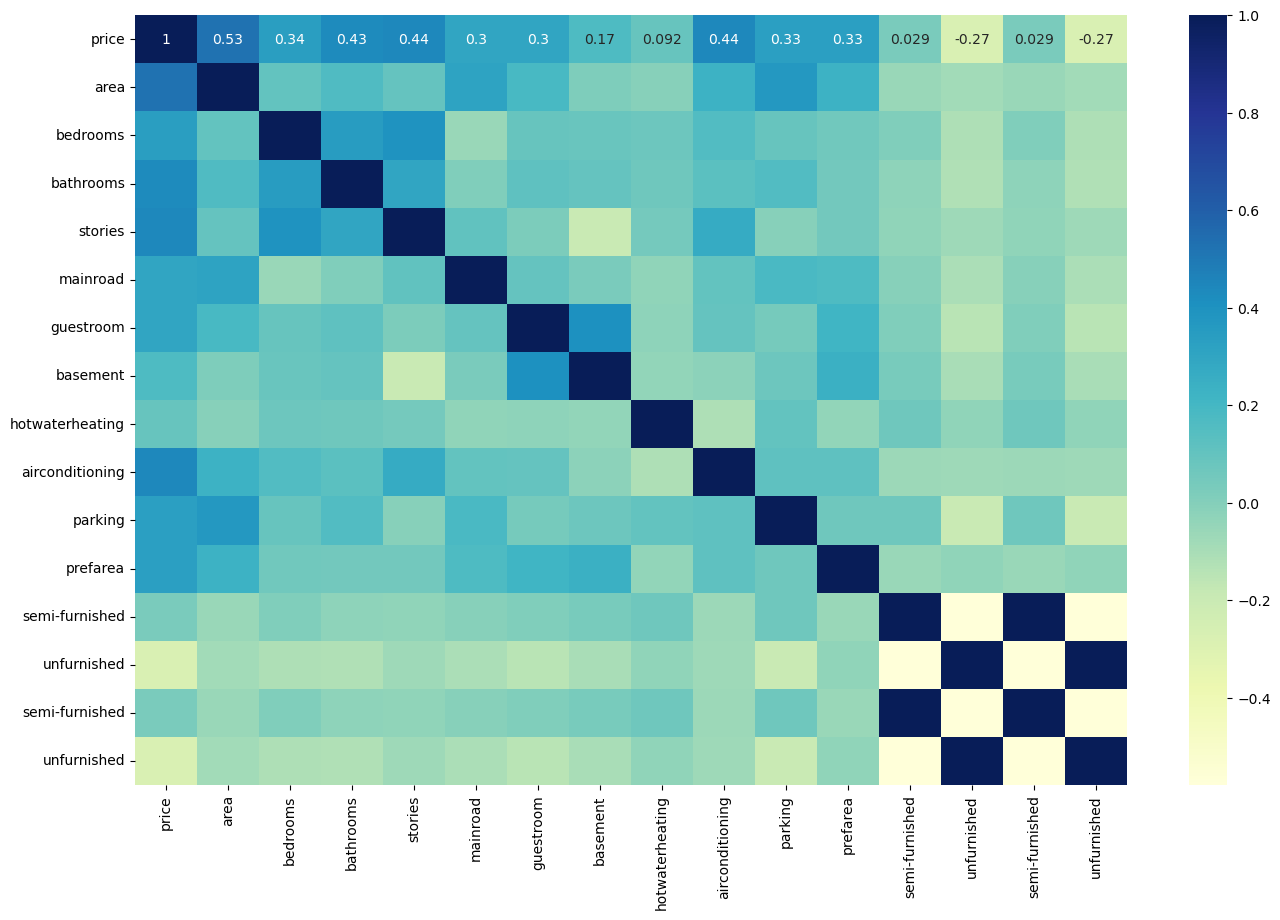

In [60]:
#checking the highly correlated variables

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Dividing into X and Y sets for the model building

In [61]:
y_train = df_train.pop('price')
X_train = df_train

#### Model Building
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [62]:
#Recursive feature elimination

In [63]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Run RFE with the number of features to select equal to 6
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

# Get the support and ranking of features
support = rfe.support_
ranking = rfe.ranking_

print("Selected Features: ", support)
print("Feature Ranking: ", ranking)

Selected Features:  [ True False  True  True False False False  True  True False  True False
 False False False]
Feature Ranking:  [ 1  5  1  1  6  3  7  1  1  2  1 10  4  9  8]


In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 5),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 6),
 ('guestroom', False, 3),
 ('basement', False, 7),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1),
 ('semi-furnished', False, 10),
 ('unfurnished', False, 4),
 ('semi-furnished', False, 9),
 ('unfurnished', False, 8)]

In [71]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [73]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'semi-furnished', 'unfurnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [75]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [76]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [77]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [78]:
# summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     85.91
Date:                Sun, 19 May 2024   Prob (F-statistic):           8.72e-66
Time:                        15:19:39   Log-Likelihood:                 201.98
No. Observations:                 357   AIC:                            -390.0
Df Residuals:                     350   BIC:                            -362.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1024      0.017     

In [80]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.11
3,stories,1.17
5,airconditioning,1.15
1,area,1.13
2,bathrooms,1.12
6,prefarea,1.06
4,hotwaterheating,1.02


#### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [85]:
y_train_price = lm.predict(X_train_rfe)

In [86]:
res = (y_train_price - y_train)

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

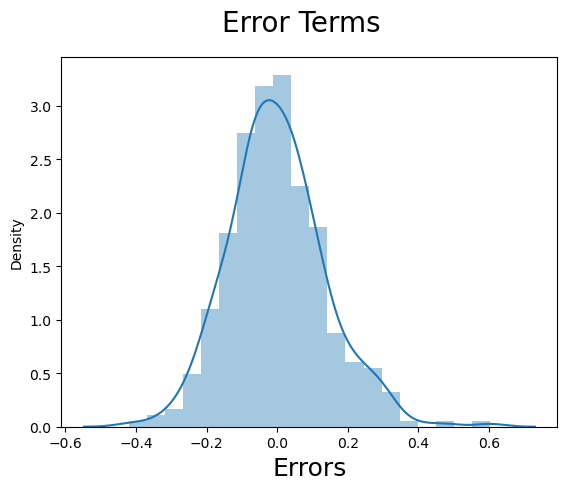

In [89]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

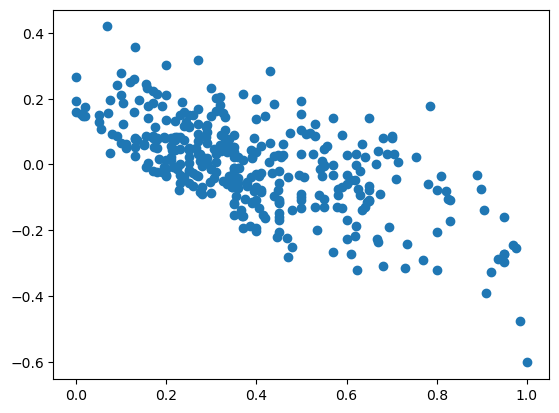

In [90]:
plt.scatter(y_train,res)
plt.show()

### Model Evaluation
Applying the scaling on the test sets

In [91]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']


In [92]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [93]:
y_test = df_test.pop('price')
X_test = df_test

In [94]:
# Adding constant variable 
X_test = sm.add_constant(X_test)

In [95]:
#Checking the predictions of model

In [100]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]


In [102]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [106]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6114550544117663

Text(0, 0.5, 'y_pred')

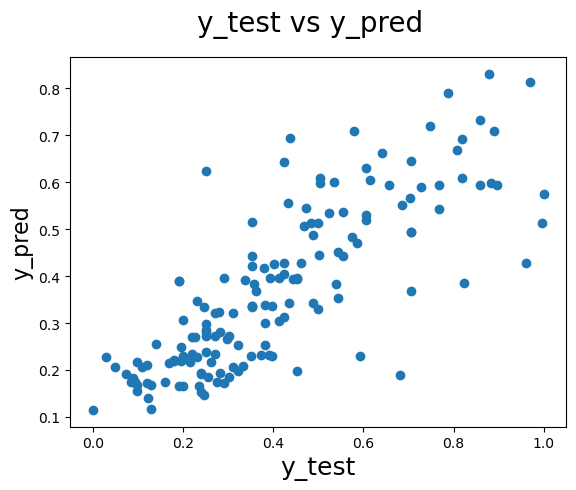

In [107]:
# Plotting y_test and y_pred 
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### We can see that the equation of our best fitted line is:

price=0.35×area+0.20×bathrooms+0.19×stories+0.10×airconditioning+0.10×parking+0.11×prefarea